# Web-scraping geophysical data using Pandas

Web-scraping is the action of getting data from online sources, without first having to download that data to a file or copying it into an excel spreadsheet.

This quick start guide shows some examples of how to scrape data from the web.

- I have not tried to beautify the plots - how do you think they could be improved?
- Whether these tricks work depends upon how the website was constructed, so they wont always work...!
- But when they do it can be really helpful and save you lot's of time!
- There will be a web-scraping course made available on DataCamp in the Autumn.

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

---

## INTRODUCTION: Load a local file [same as on DataCamp Pandas tutorial]

In [10]:
file = "Datasets/Global Landslide Database/GLC03122015.csv"

In [11]:
dataset = pd.read_csv(file)

In [12]:
dataset.head()

the_geom  OBJECTID    id  \
0    POINT (-73.40200000000006 41.55850000000008)         1  3177   
1   POINT (113.91710000000012 0.1115000000000351)         2   490   
2   POINT (-127.69800000000009 52.35450000000008)         3  6760   
3   POINT (-127.50620000000009 50.70530000000013)         4  2494   
4  POINT (-132.41490000000013 53.331900000000125)         5  6415   

                          date_                         time_        country  \
0  03/07/2011 08:00:00 AM +0000  12/30/1899 08:00:00 AM +0000  United States   
1  04/01/2008 07:00:00 AM +0000                           NaN      Indonesia   
2  01/30/2015 08:00:00 AM +0000  12/30/1899 08:00:00 AM +0000            NaN   
3  09/24/2010 07:00:00 AM +0000                           NaN         Canada   
4  08/31/2014 07:00:00 AM +0000  12/30/1899 08:00:00 AM +0000            NaN   

                                          nearest_pl hazard_typ landslide_  \
0  Grove Street from Anderson Avenue to Hine Hill...  landslide   Mudslide   
1                                      Borneo, Muara  landslide  Landslide   
2                                  Ocean Falls, B.C.  landslide   Mudslide   
3  road to Holberg, 3 km from hwy 19, Vancouver I...  landslide    Complex   
4                                 Rennell Sound Road  landslide   Mudslide   

    trigger    ...     population  countrycod  continentc key_ version  \
0  Downpour    ...           6523         NaN         NaN   US       1   
1      Rain    ...              0         NaN          AS   ID       1   
2      Rain    ...           8987         NaN         NaN   CA       2   
3  Downpour    ...          33430         NaN         NaN   CA       1   
4  Downpour    ...          14708         NaN         NaN   CA       1   

  user_id                                   tstamp  changeset_ latitude  \
0       1  Tue Apr 01 2014 00:00:00 GMT+0000 (UTC)           1  41.5585   
1       1  Tue Apr 01 2014 00:00:00 GMT+0000 (UTC)           1   0.1115   
2       7  Tue Feb 17 2015 15:42:41 GMT+0000 (UTC)  3910846556  52.3545   
3       1  Tue Apr 01 2014 00:00:00 GMT+0000 (UTC)           1  50.7053   
4       7  Thu Dec 04 2014 15:14:07 GMT+0000 (UTC)  1280292118  53.3319   

   longitude  
0   -73.4020  
1   113.9171  
2  -127.6980  
3  -127.5062  
4  -132.4149  

[5 rows x 35 columns]

---

## 1. Icelandic Met Office: Earthquake catalogue [from space delimited data]

Look at this website: http://hraun.vedur.is/ja/viku/2018/vika_10/listi

Put the url in the code below and run it:

Nr     Dags.       Timi    Breidd     Lengd    Dypi     M    ML
0   1  20180305   3101.452  66.38457 -17.14205   2.961  1.05  1.06
1   2  20180305   3204.698  66.39698 -17.18137  15.487  1.04  1.12
2   3  20180305  13518.645  64.00966 -16.58854   0.383 -0.11 -0.17
3   4  20180305  14043.995  64.05589 -21.24443   6.250  0.62  0.56
4   5  20180305  15041.962  65.17667 -16.42191   6.511  0.20  0.48

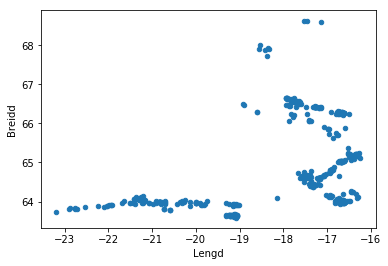

In [14]:
url = "http://hraun.vedur.is/ja/viku/2018/vika_10/listi"
df = pd.read_csv(url , delim_whitespace=True)

df.plot(kind="scatter", x="Lengd", y="Breidd")

df.head()

---

## 2. NOAA: Significant volvanic eruptions [tab delimited data]

There us a tab delimited download off here:
https://www.ngdc.noaa.gov/nndc/servlet/ShowDatasets?dataset=102557&search_look=50&display_look=50

In [15]:
url="https://www.ngdc.noaa.gov/nndc/struts/results?type_0=Exact&query_0=$HAZ_EVENT_ID&t=102557&s=50&d=54&dfn=volerup.txt"
df = pd.read_csv(url,sep="\t")
df.head()

Year  Month  Day  TSU   EQ             Name            Location  \
0 -4360    NaN  NaN  NaN  NaN  Macauley Island         Kermadec Is   
1 -4350    NaN  NaN  NaN  NaN            Kikai           Ryukyu Is   
2 -4050    NaN  NaN  NaN  NaN           Masaya           Nicaragua   
3 -4000    NaN  NaN  NaN  NaN             Pago  New Britain-SW Pac   
4 -3580    NaN  NaN  NaN  NaN             Taal   Luzon-Philippines   

            Country  Latitude  Longitude                 ...                  \
0       New Zealand   -30.200   -178.470                 ...                   
1             Japan    30.780    130.280                 ...                   
2         Nicaragua    11.984    -86.161                 ...                   
3  Papua New Guinea    -5.580    150.520                 ...                   
4       Philippines    14.002    120.993                 ...                   

   TOTAL_DEATHS TOTAL_DEATHS_DESCRIPTION TOTAL_MISSING  \
0           NaN                      NaN           NaN   
1           NaN                      3.0           NaN   
2           NaN                      NaN           NaN   
3           NaN                      1.0           NaN   
4           NaN                      NaN           NaN   

  TOTAL_MISSING_DESCRIPTION  TOTAL_INJURIES TOTAL_INJURIES_DESCRIPTION  \
0                       NaN             NaN                        NaN   
1                       NaN             NaN                        NaN   
2                       NaN             NaN                        NaN   
3                       NaN             NaN                        NaN   
4                       NaN             NaN                        NaN   

   TOTAL_DAMAGE_MILLIONS_DOLLARS  TOTAL_DAMAGE_DESCRIPTION  \
0                            NaN                       NaN   
1                            NaN                       3.0   
2                            NaN                       NaN   
3                            NaN                       1.0   
4                            NaN                       NaN   

   TOTAL_HOUSES_DESTROYED  TOTAL_HOUSES_DESTROYED_DESCRIPTION  
0                     NaN                                 NaN  
1                     NaN                                 3.0  
2                     NaN                                 NaN  
3                     NaN                                 NaN  
4                     NaN                                 NaN  

[5 rows x 36 columns]

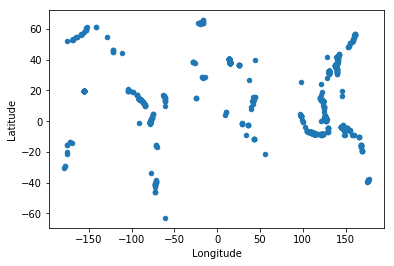

In [16]:
df.plot(kind="scatter", y="Latitude", x="Longitude")

---
## 3. Human-induced earthquakes database [Excel]

There is an excel download linked off here:
https://inducedearthquakes.org

In [17]:
xl = pd.read_excel("http://inducedearthquakes.org/wp-content/uploads/2018/08/The_Human_Induced_Earthquake_Database.xlsx")
xl.head()

Country Earthquake cause (main class)  \
0   Algeria                           CCS   
1       USA                           CCS   
2  Botswana        Coal Bed Methane (CBM)   
3        UK                  Construction   
4    Taiwan                  Construction   

            Earthquake cause (subclass)  \
0                         CO2 injection   
1                         CO2 injection   
2                Coal Bed Methane (CBM)   
3  Coastal engineering (geoengineering)   
4                          Construction   

                            Project name  Latitude (approximate)  \
0                               In Salah               29.088942   
1  Decatur, Illinois, demonstration site               39.876933   
2           Selemo and Lesedi pilot pods              -22.586373   
3                             Folkestone               51.104297   
4                             Taipei 101               25.033985   

  Longitude (approximate) Project start date Project end date  \
0                 2.21383               2004              NaN   
1                -88.8934    2011 (November)  2014 (November)   
2                 25.8459               2014              NaN   
3                 1.27138               1806              NaN   
4                 121.564                NaN              NaN   

  Seismicity or monitoring start date Seismicity or monitoring end date  \
0                       2009 (August)                       2011 (June)   
1                         2013 (July)                   2014 (December)   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 NaN                               NaN   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

  Maximum injection/extraction rate (max unless stated) Rate units  \
0                                                 43       mcf/day   
1                                               11.6          kg/s   
2                                                NaN           NaN   
3                                                NaN           NaN   
4                                                NaN           NaN   

   Total volume or mass of material injected/extracted Volume or mass units  \
0                 3850000 (as of 2013), 3500000 (m3)                 tonnes   
1                               1000000, 910000 (m3)                 tonnes   
2                                                NaN                    NaN   
3                                         2800000000                     kg   
4                                     258138 (proxy)                    NaN   

  Maximum injection pressure (MPa) Change in reservoir pressure (MPa)  \
0                               16                      12 (modelled)   
1                              NaN                                NaN   
2                              NaN                                NaN   
3                              NaN                                NaN   
4                              NaN                                NaN   

   Stress change (MPa) Bottom hole temperature (°C)  \
0                  NaN                          NaN   
1                  NaN                          NaN   
2                  NaN                          NaN   
3           0.001-0.03                          NaN   
4                 0.47                          NaN   

                                               Notes  \
0  Injection into gas field but no apparent conne...   
1   Volume assuming liquid CO2 density of 1100 kg/m3   
2  Albano et al. (2017) provide strong evidence f...

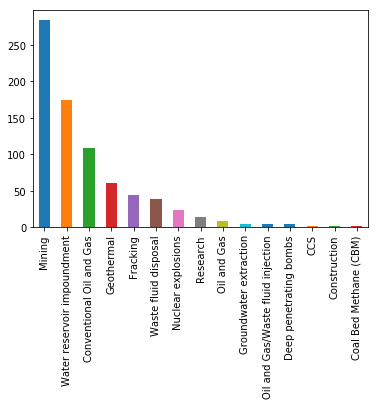

In [18]:
xl['Earthquake cause (main class)'].value_counts().plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113df2a90>],
      dtype=object)

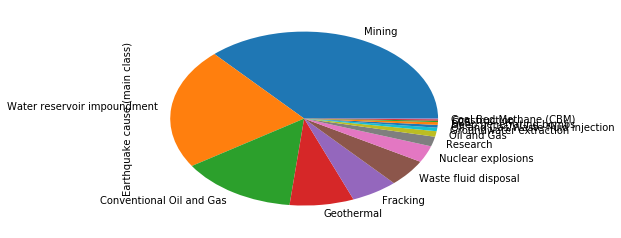

In [19]:
xl['Earthquake cause (main class)'].value_counts().plot(kind='pie', subplots=True)

---

## 4. Our world in natural catastrophies [from html table]

Have a look at this page and the underlying datasets linked from here:

https://ourworldindata.org/natural-catastrophes

In [20]:
dfs = pd.read_html("https://ourworldindata.org/ofdacred-international-disaster-data")

In [21]:
df1 = dfs[0]
df1.index=df1['Yearly average global annual deaths from natural disasters, by decade']
df1 = df1.drop('Yearly average global annual deaths from natural disasters, by decade', 1)
df1

Drought  Earthquake  \
Yearly average global annual deaths from natura...                        
1900s                                                130000       17302   
1910s                                                  8500        6280   
1920s                                                472400       54935   
1930s                                                     0       23770   
1940s                                                345000       16187   
1950s                                                     0        2093   
1960s                                                150865        5236   
1970s                                                 11908       44022   
1980s                                                 55727        6015   
1990s                                                   311       10359   
2000s                                                   115       45364   
2010s                                                  3339       43302   

                                                    Extreme temperature  \
Yearly average global annual deaths from natura...                        
1900s                                                                 0   
1910s                                                                 0   
1920s                                                                 0   
1930s                                                               169   
1940s                                                                 0   
1950s                                                               150   
1960s                                                               113   
1970s                                                               155   
1980s                                                               534   
1990s                                                               932   
2000s                                                              9106   
2010s                                                             11644   

                                                     Flood  Impact  Landslide  \
Yearly average global annual deaths from natura...                              
1900s                                                   63       0          5   
1910s                                                10138       0          0   
1920s                                                  428       0         43   
1930s                                               436147       0        103   
1940s                                                10103       0       1753   
1950s                                               205830       0        215   
1960s                                                 3239       0        504   
1970s                                                 5078       0        738   
1980s                                                 5155       0        623   
1990s                                                 9549       0        833   
2000s                                                 5401       0        772   
2010s                                                 5811       0       1069   

                                                    Mass movement (dry)  \
Yearly average global annual deaths from natura...                        
1900s                                                                13   
1910s                                                                12   
1920s                                                                 0   
1930s                                                                 4   
1940s                                                                 0   
1950s                                                                 0   
1960s                                                               218   
1970s                                                                 7   
1980s                                                            

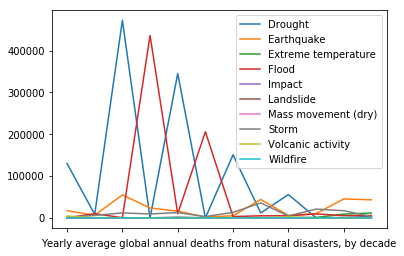

In [22]:
## For a line plot
df1.plot(kind="line")

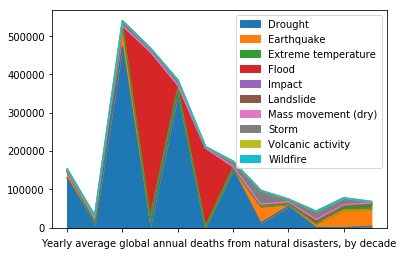

In [23]:
## For stacked area plot
df1.plot(kind="area")

---

## 5. Specific heats and molar heat capacities for various substances at 20 C [html table]

http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/sphtt.html#c1

In [24]:
dfs = pd.read_html("http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/sphtt.html#c1")

In [ ]:
dfs[1]